#TRAIN DATA

### IMPORTING NECESSARY LIBRARIES AND FILE UPLOAD

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#from google.colab import files
#uploaded = files.upload()

In [68]:
train_data =  pd.read_csv('/content/train_data.csv')
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [69]:
train_data.info() ##provides information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [70]:
train_data.describe() #gives the description of data and details about measures of central tendencies

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


###EXPLORATORY DATA ANALYSIS & PERFORMING PREPROCESSING STEPS

In [71]:
# Numerical features


num_feature = [features for features in train_data.columns if train_data[features].dtypes!="O" and features !='is_promoted']
print("Numerical features are: ",num_feature)


# Categorical Columns

cat_feature = [features for features in train_data.columns if train_data[features].dtypes=="O" and features !='is_promoted']
print("Categorical columns are: ",cat_feature)

Numerical features are:  ['employee_id', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score']
Categorical columns are:  ['department', 'region', 'education', 'gender', 'recruitment_channel']


######Plotting Frequency Graph

array([[<Axes: title={'center': 'employee_id'}>,
        <Axes: title={'center': 'no_of_trainings'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'previous_year_rating'}>,
        <Axes: title={'center': 'length_of_service'}>,
        <Axes: title={'center': 'KPIs_met >80%'}>],
       [<Axes: title={'center': 'awards_won?'}>,
        <Axes: title={'center': 'avg_training_score'}>,
        <Axes: title={'center': 'is_promoted'}>]], dtype=object)

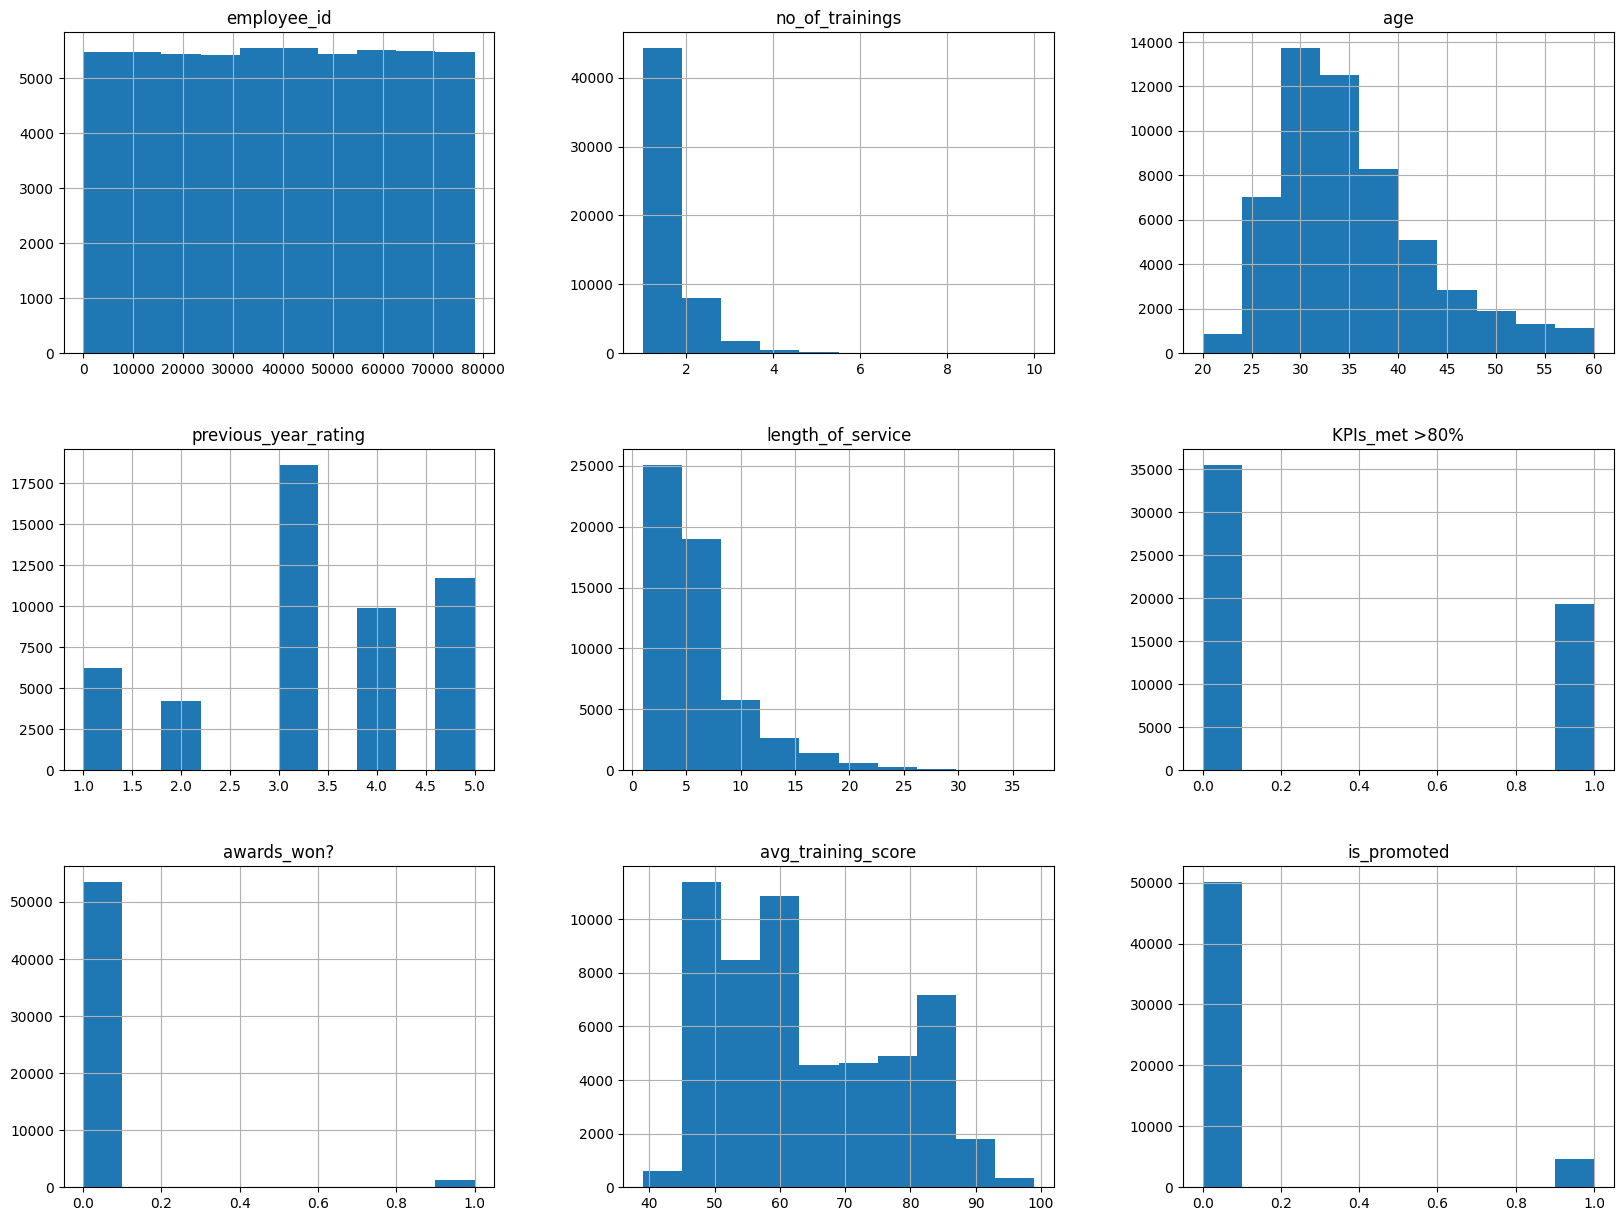

In [72]:
# used for frequency distribution in an interval
# also helps to know if the data is normally distributed or data has skewness.

freq_graph = train_data.select_dtypes(include = ["float", "int"])
freq_graph.hist(figsize = (20, 15))

###### MISSING VALUE HANDLING

In [73]:
train_data.isnull().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


######Missing values are present only in two columns education and previous year rating.
###### Fiiling the numerical column using median and categorical column using mode.

In [74]:
## Filling missing values

## NUMERICAL COLUMNS

train_data["previous_year_rating"] = train_data["previous_year_rating"].fillna(train_data["previous_year_rating"].median())


## CATEGORICAL COLUMNS

train_data["education"] = train_data["education"].fillna(train_data["education"].mode()[0])

In [75]:
train_data.duplicated().sum() ##check if there's any deplicates

0

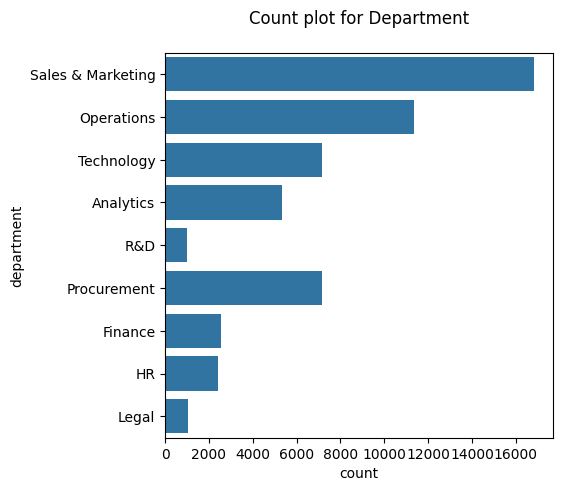

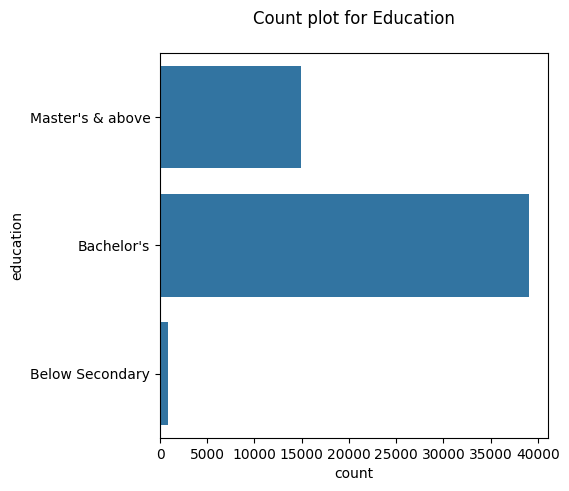

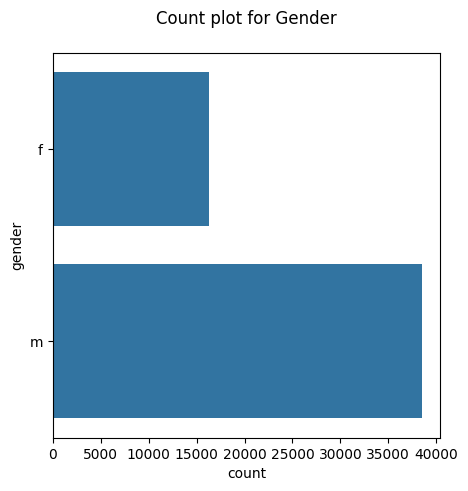

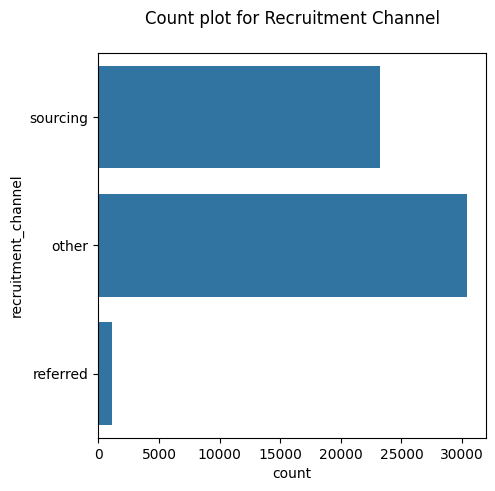

In [76]:
##PLOTTING THE CATEGORICAL DATA TO OBSERVE THE DATASET

# Plotting department attribute

plt.figure(figsize=(5,5))
sns.countplot(train_data["department"])
plt.title("Count plot for Department\n")
plt.show()


# Plotting Education attribute

plt.figure(figsize=(5,5))
sns.countplot(train_data["education"])
plt.title("Count plot for Education\n")
plt.show()



# Plotting Gender attribute

plt.figure(figsize=(5,5))
sns.countplot(train_data["gender"])
plt.title("Count plot for Gender\n")
plt.show()


# Plotting Recruitment Channel attribute

plt.figure(figsize=(5,5))
sns.countplot(train_data["recruitment_channel"])
plt.title("Count plot for Recruitment Channel\n")
plt.show()


The following conclusions are made:

There are 9 departments in the comapany most of the people considered are from Sales and Marketing department.

Most employees in the company holds bachelor's degree.

Majority of company employees are males rather than females.

People are recruited through other means as compared to referred and sourcing

In [77]:
## CHECK SKEWNESS

for i in num_feature:
  print(i,":",train_data[i].skew())

employee_id : -0.0031279471733061466
no_of_trainings : 3.445433937567454
age : 1.0074317710382241
previous_year_rating : -0.2608580288123413
length_of_service : 1.738061458740809
KPIs_met >80% : 0.61990886872196
awards_won? : 6.338913659392756
avg_training_score : 0.45190808551707995


The skewness value of number of trainings and awards won are slightly high.


###OUTLIER DETECTION

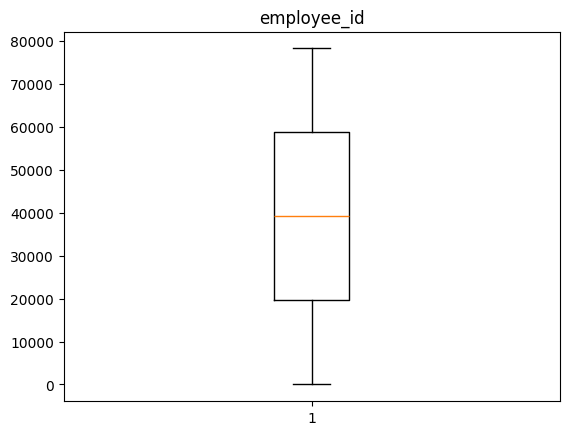

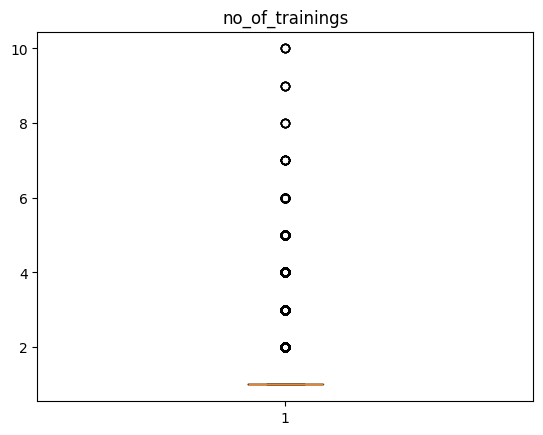

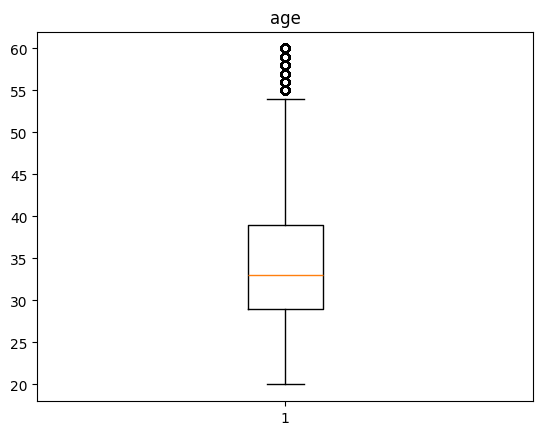

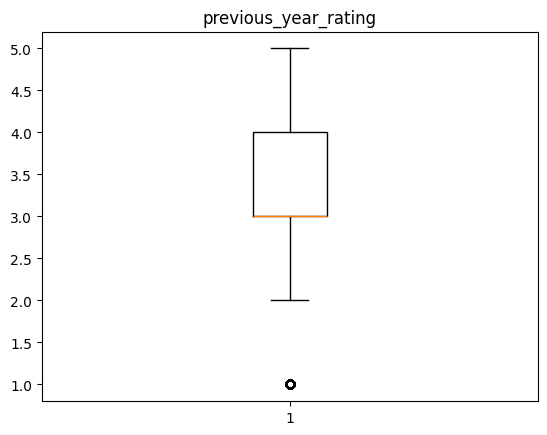

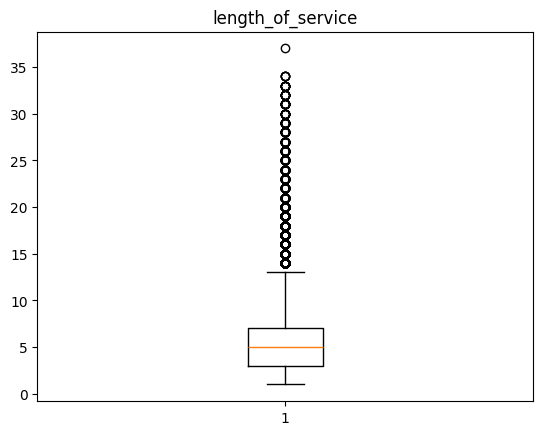

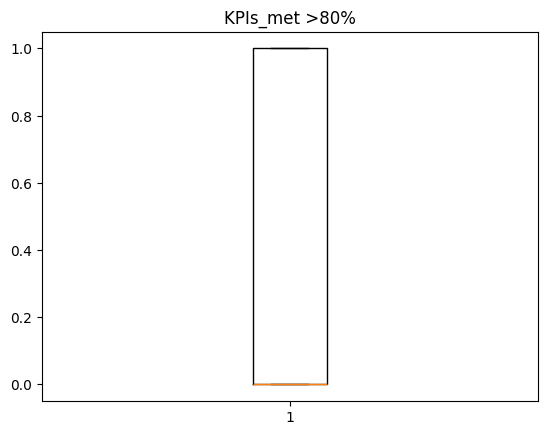

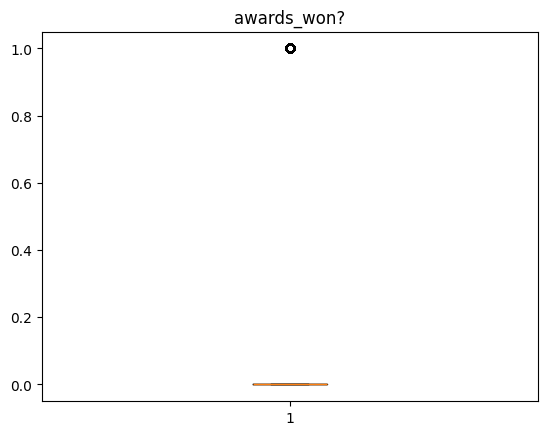

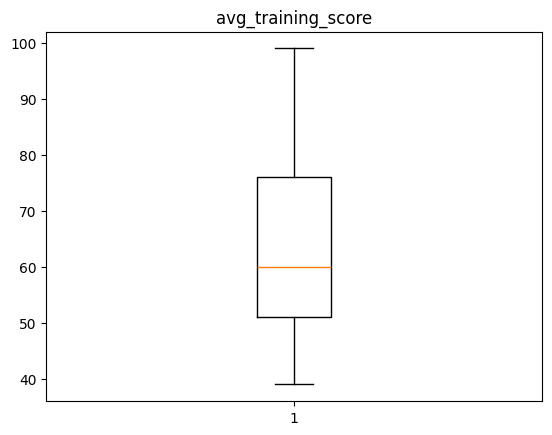

In [78]:
for i in num_feature:
    plt.boxplot(train_data[i])
    plt.title(i)
    plt.show()

While plotting the outlier we could see that number of training, age, length of service columns have outliers. But on understanding the data we say that the values in this columns vary for different employees, for eg., the trainings attended by employee1 could be 1, employee 2 could be 5 and for n employees it can be different.
Likewise, age, service period of the employees are also different.

Therefore all those datapoints outside the range cannot be considered as outliers.

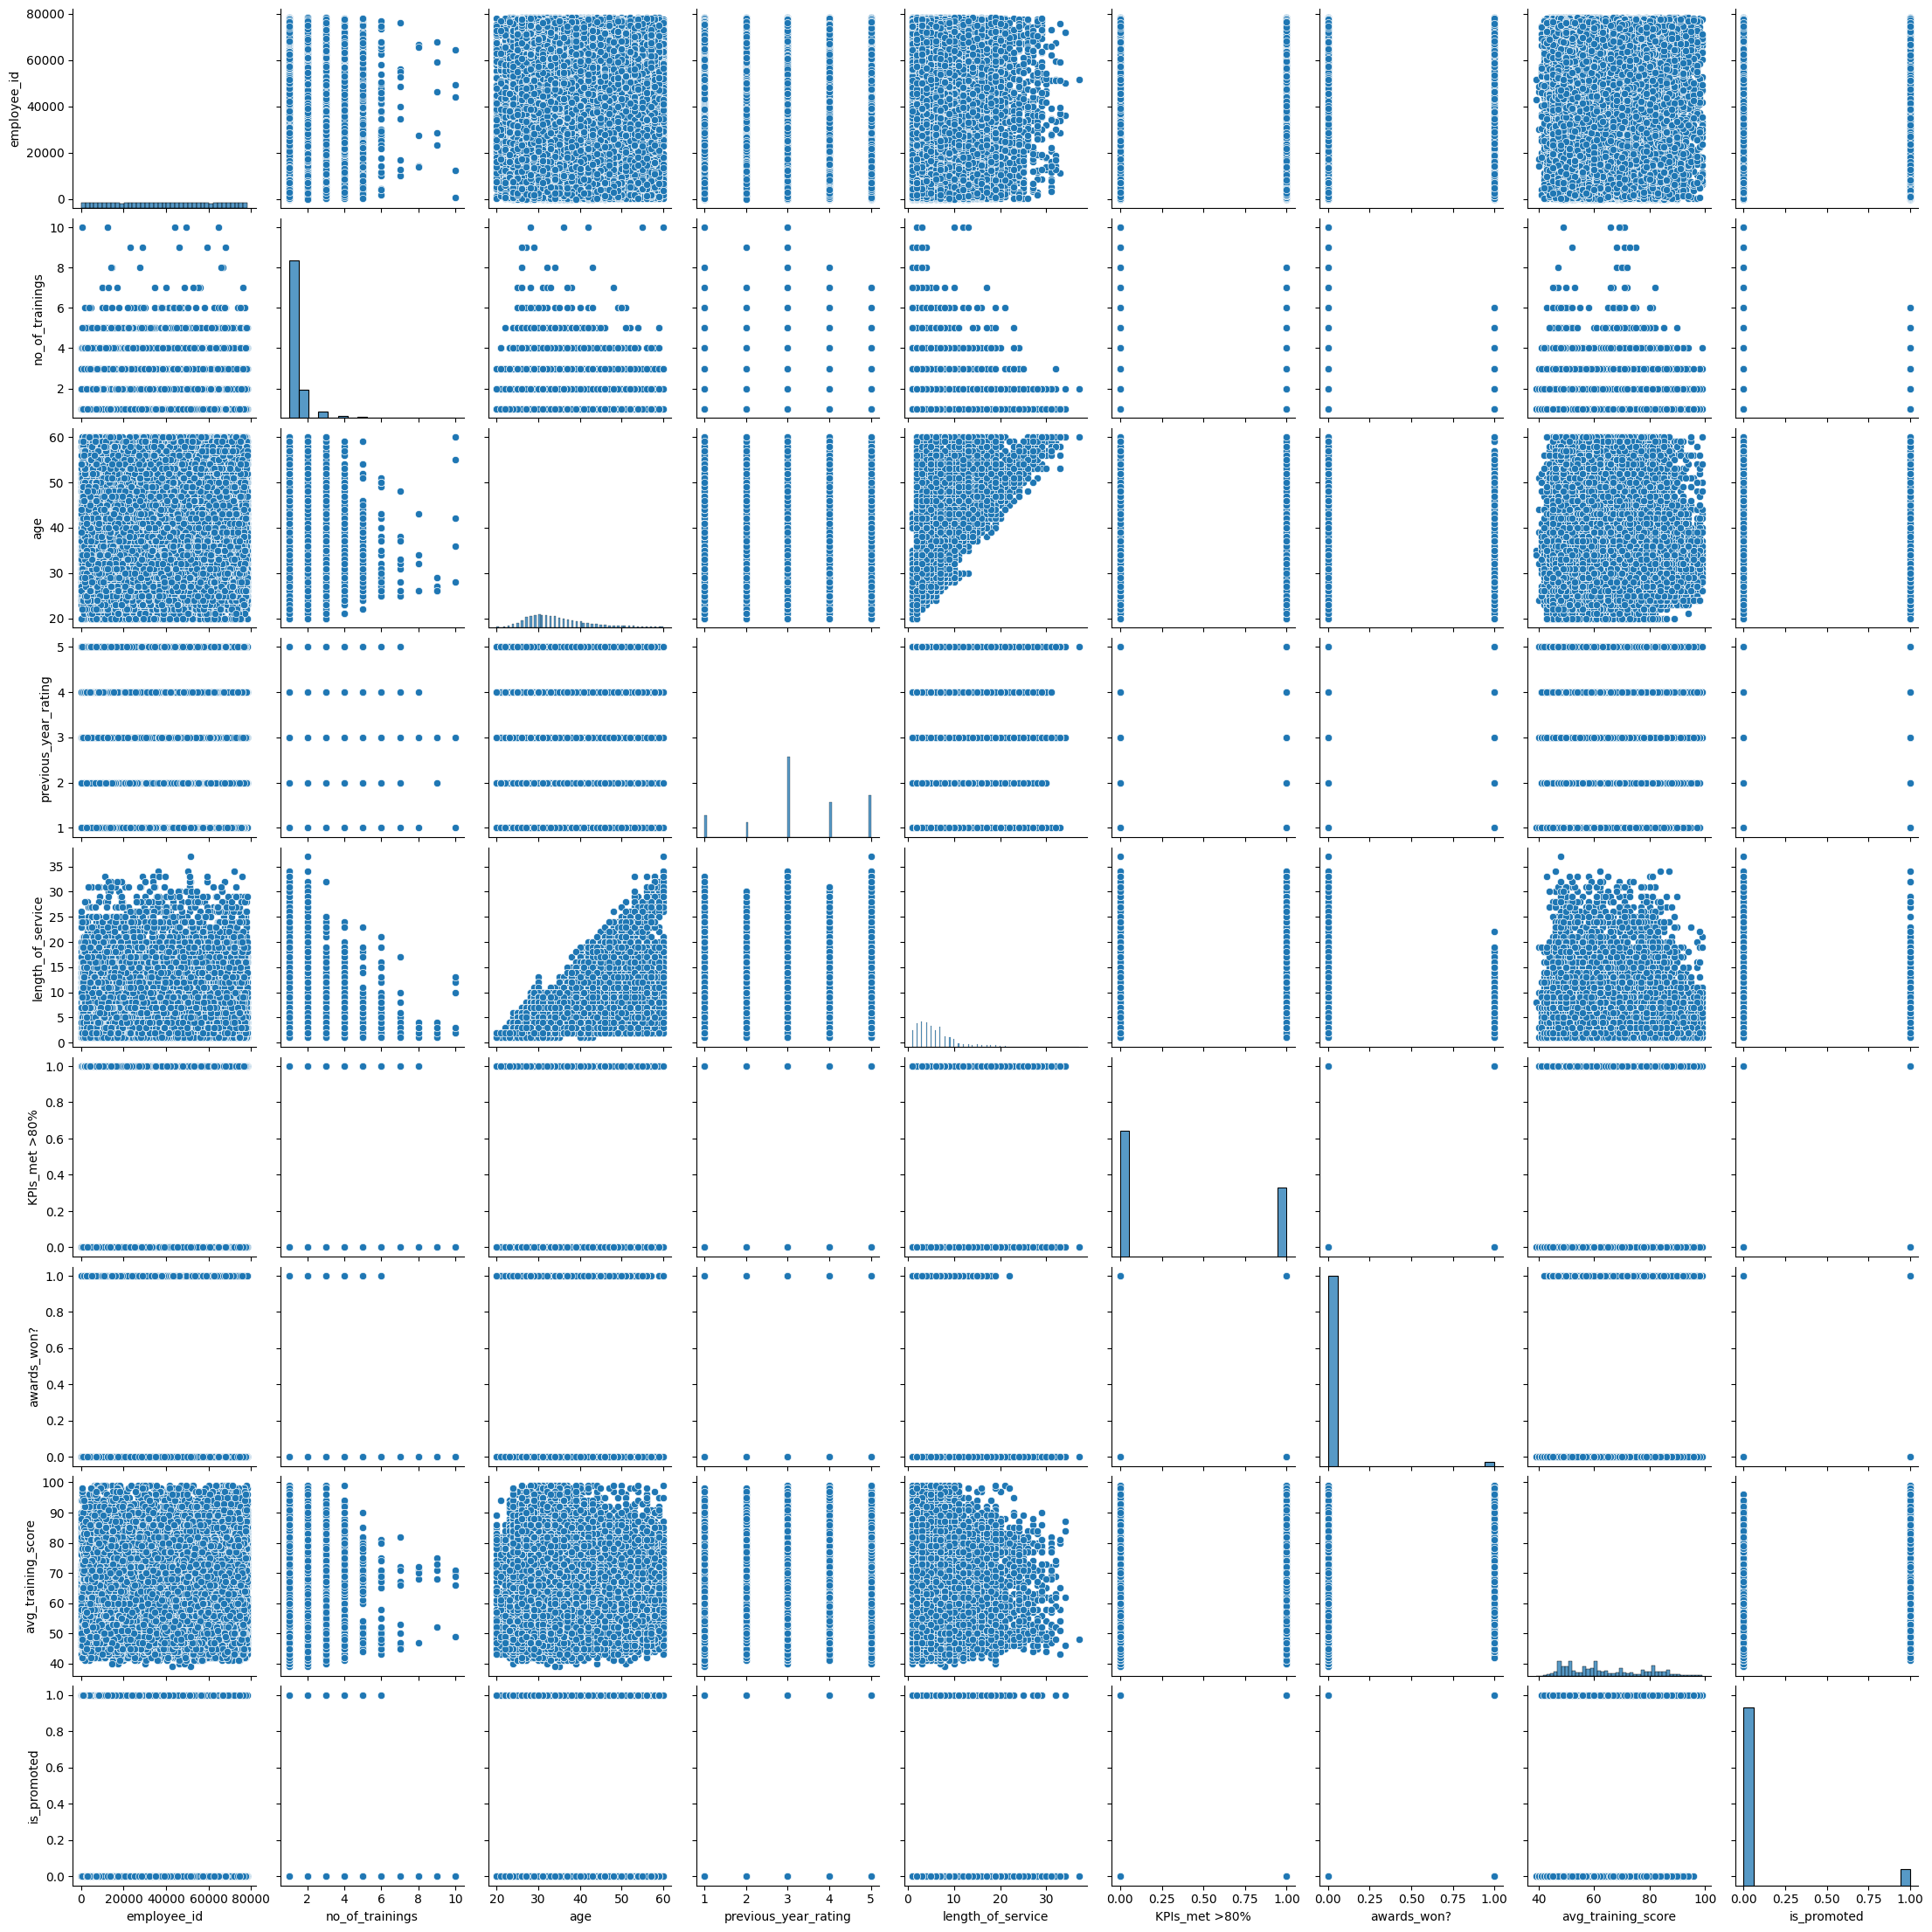

In [79]:
## Pairplot is used to identify the outlier so as to conclude whether to remove outlier or not.
sns.pairplot(train_data)

On observing the pairplot we could see a perfect data without outliers.

<Axes: >

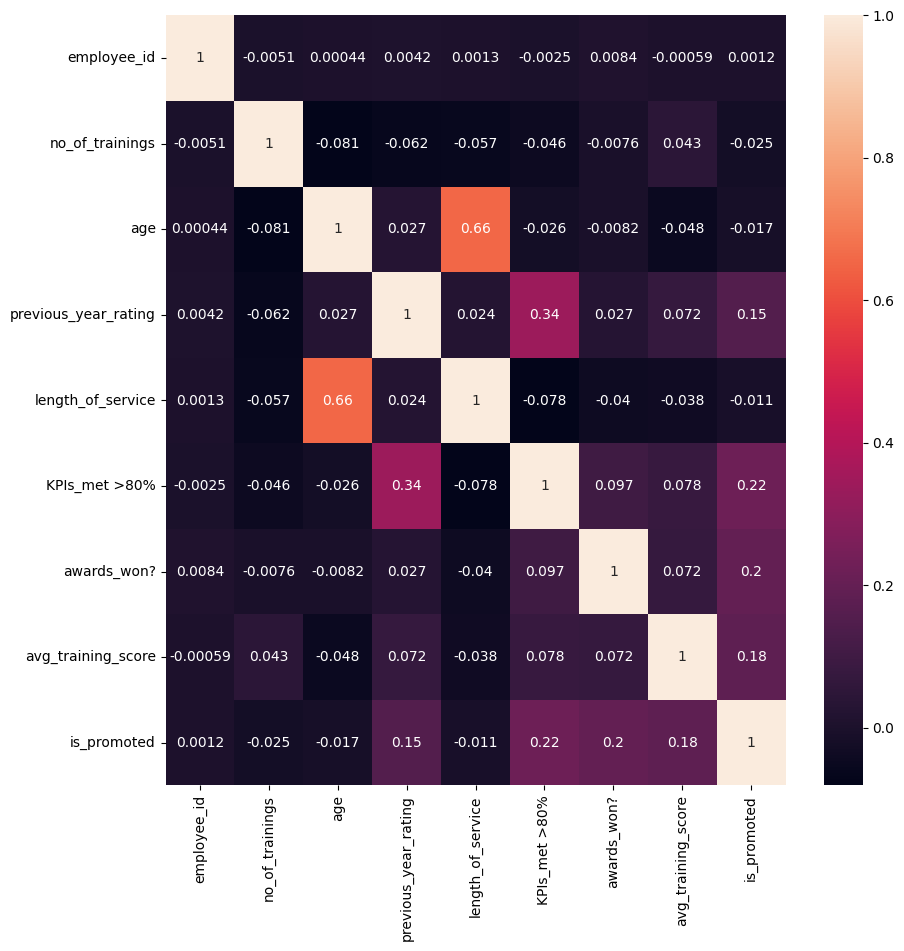

In [80]:
## CORRELATION MATRIX

plt.figure(figsize=(10,10))
sns.heatmap(train_data.corr(numeric_only=True), annot=True)

###ONE HOT ENCODING

As the columns to be encoded has many values rather than giving ranks in label encoding, here new columns are created on an array basis.

Label encoding can lead to a significant increase in dimensionality when dealing with categorical features with a high number of unique categories also loss of information about the original categorical data.

because of all these reasons we choose one hot encoding technique.

In [81]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
train_data = pd.get_dummies(train_data, columns = ["department", "region", "education", "gender", "recruitment_channel"], drop_first = True)
train_data.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,1,35,5.0,8,1,0,49,0,False,...,False,False,True,False,False,False,True,False,False,True
1,65141,1,30,5.0,4,0,0,60,0,False,...,False,False,False,False,False,False,False,True,False,False
2,7513,1,34,3.0,7,0,0,50,0,False,...,False,False,False,False,False,False,False,True,False,True
3,2542,2,39,1.0,10,0,0,50,0,False,...,False,False,False,False,False,False,False,True,False,False
4,48945,1,45,3.0,2,0,0,73,0,False,...,False,False,False,False,False,False,False,True,False,False


### SCALING THE DATASET

In [82]:
##As we don't scale encoded columns, dropping encoded columns
##As the value ranges from 0 to 5000, standard scaling helps to rescale values to a range 0 to 1

from sklearn.preprocessing import StandardScaler

stdclr = StandardScaler()
train_data.loc[:,num_feature] = stdclr.fit_transform(train_data[num_feature]) #selecting the numerical columns to be scaled
train_data.head()

<ipython-input-82-e55433b90098>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.16185837  1.14870885 -1.40274081 ... -1.11916278 -1.13262222
  0.54591182]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_data.loc[:,num_feature] = stdclr.fit_transform(train_data[num_feature]) #selecting the numerical columns to be scaled
<ipython-input-82-e55433b90098>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.41527615 -0.41527615 -0.41527615 ... -0.41527615 -0.41527615
 -0.41527615]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_data.loc[:,num_feature] = stdclr.fit_transform(train_data[num_feature]) #selecting the numerical columns to be scaled
<ipython-input-82-e55433b90098>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and wi

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,1.161858,-0.415276,0.025598,1.395766,0.500460,1.356878,-0.154018,-1.075931,0,False,...,False,False,True,False,False,False,True,False,False,True
1,1.148709,-0.415276,-0.627135,1.395766,-0.437395,-0.736986,-0.154018,-0.253282,0,False,...,False,False,False,False,False,False,False,True,False,False
2,-1.402741,-0.415276,-0.104948,-0.250651,0.265996,-0.736986,-0.154018,-1.001145,0,False,...,False,False,False,False,False,False,False,True,False,True
3,-1.622829,1.226063,0.547785,-1.897069,0.969387,-0.736986,-0.154018,-1.001145,0,False,...,False,False,False,False,False,False,False,True,False,False
4,0.431639,-0.415276,1.331064,-0.250651,-0.906322,-0.736986,-0.154018,0.718939,0,False,...,False,False,False,False,False,False,False,True,False,False


###SPLITTING TARGET AND INDEPENDENT FEATURES

In [83]:
from sklearn.model_selection import train_test_split

x = train_data.drop("is_promoted", axis = 1)
y = train_data["is_promoted"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [84]:
##Importing the metrics needed to calculate the accuracy of the model

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

###CLASSIFICATION AND ENSEMBLE MODELS

###### 1) Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression

# using scaled data
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

##Using metrics

print("CONFUSION MATRIX: ",confusion_matrix(y_test, y_pred_lr))
print("ACCURACY: ",accuracy_score(y_test, y_pred_lr),"\n")
print("PRECISION: ",precision_score(y_test, y_pred_lr))
print("RECALL ",recall_score(y_test, y_pred_lr))
print("F1 SCORE: ",f1_score(y_test, y_pred_lr))

CONFUSION MATRIX:  [[10004    50]
 [  689   219]]
ACCURACY:  0.9325852946542602 

PRECISION:  0.8141263940520446
RECALL  0.24118942731277532
F1 SCORE:  0.3721325403568394


######2) knn

[0.904123335157818, 0.9189016602809706, 0.9151614668856048, 0.9201787994891443, 0.9195402298850575, 0.9205436964057654, 0.9202700237182996, 0.9213647144681627, 0.9209085933223864, 0.9209085933223864, 0.9209998175515417, 0.9215471629264733]


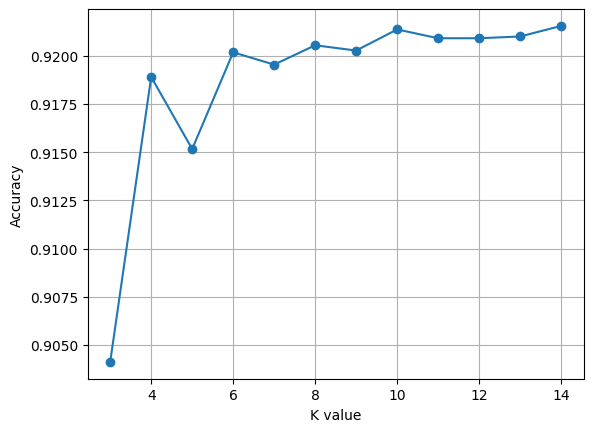

In [86]:
from sklearn.neighbors import KNeighborsClassifier

metric_k = []
neighbors = np.arange(3,15)

# using scaled data
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier.fit(x_train,y_train)
  y_pred_k = classifier.predict(x_test)
  acc = accuracy_score(y_test,y_pred_k)
  metric_k.append(acc)

print(metric_k)



##Plotting the metric

plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [87]:
##With k value 10, using scaled data

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)

print("CONFUSION MATRIX: ",confusion_matrix(y_test, y_pred_knn))
print("ACCURACY: ",accuracy_score(y_test, y_pred_knn),"\n")
print("PRECISION: ",precision_score(y_test, y_pred_knn))
print("RECALL ",recall_score(y_test, y_pred_knn))
print("F1 SCORE: ",f1_score(y_test, y_pred_knn))

CONFUSION MATRIX:  [[10030    24]
 [  838    70]]
ACCURACY:  0.9213647144681627 

PRECISION:  0.7446808510638298
RECALL  0.07709251101321586
F1 SCORE:  0.13972055888223553


###### 3) SVM

In [88]:
from sklearn.svm import SVC

#Using scaled data
svm = SVC(kernel = "poly")
svm.fit(x_train,y_train)
y_pred_svm = svm.predict(x_test)

print("CONFUSION MATRIX: ",confusion_matrix(y_test, y_pred_svm))
print("ACCURACY: ",accuracy_score(y_test, y_pred_svm))
print("PRECISION: ",precision_score(y_test, y_pred_svm))
print("RECALL ",recall_score(y_test, y_pred_svm))
print("F1 SCORE: ",f1_score(y_test, y_pred_svm))

CONFUSION MATRIX:  [[10037    17]
 [  740   168]]
ACCURACY:  0.9309432585294655
PRECISION:  0.9081081081081082
RECALL  0.18502202643171806
F1 SCORE:  0.3074107959743824


###### 4) Decision Tree

In [89]:
from sklearn.tree import DecisionTreeClassifier

#using scaled data
dt = DecisionTreeClassifier(criterion = "entropy")
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)

print("CONFUSION MATRIX: ",confusion_matrix(y_test, y_pred_dt))
print("ACCURACY: ",accuracy_score(y_test, y_pred_dt))
print("PRECISION: ",precision_score(y_test, y_pred_dt))
print("RECALL ",recall_score(y_test, y_pred_dt))
print("F1 SCORE: ",f1_score(y_test, y_pred_dt))

CONFUSION MATRIX:  [[9441  613]
 [ 513  395]]
ACCURACY:  0.8972815179711732
PRECISION:  0.39186507936507936
RECALL  0.43502202643171806
F1 SCORE:  0.4123173277661795


######5) Naive Bayes

In [90]:
from sklearn.naive_bayes import GaussianNB

#using scaled data
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred_gnb = gnb.predict(x_test)

print("CONFUSION MATRIX: ",confusion_matrix(y_test, y_pred_gnb))
print("ACCURACY: ",accuracy_score(y_test, y_pred_gnb))
print("PRECISION: ",precision_score(y_test, y_pred_gnb))
print("RECALL ",recall_score(y_test, y_pred_gnb))
print("F1 SCORE: ",f1_score(y_test, y_pred_gnb))

CONFUSION MATRIX:  [[2572 7482]
 [ 100  808]]
ACCURACY:  0.3083378945447911
PRECISION:  0.09746682750301568
RECALL  0.8898678414096917
F1 SCORE:  0.17569036747118938


###### 6) Bagging Classifier

In [91]:
from sklearn.ensemble import BaggingClassifier

bc = BaggingClassifier()
bc.fit(x_train, y_train)
y_pred_bc = bc.predict(x_test)
acc_bc = accuracy_score(y_test, y_pred_bc)
print("Accuracy for Bagging Classifier = ",acc_bc)

Accuracy for Bagging Classifier =  0.9369640576537128


######7) ADAPTIVE BOOSTING

In [92]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()
abc.fit(x_train, y_train)
y_pred_abc = abc.predict(x_test)
acc_abc = accuracy_score(y_test, y_pred_abc)
print("Accuracy for Adaptive Boosting = ",acc_abc)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy for Adaptive Boosting =  0.927020616675789


In [93]:
abc_n = AdaBoostClassifier(n_estimators=100)
abc_n.fit(x_train, y_train)
y_pred_abc_n = abc_n.predict(x_test)
acc_abc_n = accuracy_score(y_test, y_pred_abc_n)
print("Accuracy for Ada Boost model with n estimators = ",acc_abc_n)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy for Ada Boost model with n estimators =  0.9282065316548075


######8)GRADIENT BOOSTING

In [94]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
y_pred_gb = gb.predict(x_test)
acc_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy for Gradient Boost model = ",acc_gb)

Accuracy for Gradient Boost model =  0.9402481299033023


In [95]:
gb1 = GradientBoostingClassifier(n_estimators=100)
gb1.fit(x_train, y_train)
y_pred_gb1 = gb1.predict(x_test)
acc_gb1 = accuracy_score(y_test, y_pred_gb1)
print("Accuracy of Gradient Boost with n estimators = ",acc_gb1)

Accuracy of Gradient Boost with n estimators =  0.9402481299033023


######9) XGBOOST

In [96]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()

xgb_model.fit(x_train, y_train)
y_pred_xgb = xgb_model.predict(x_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print("F1 SCORE: ",f1_score(y_test, y_pred_xgb))
print("Accuracy for XGBoost = ",acc_xgb)

F1 SCORE:  0.5003921568627451
Accuracy for XGBoost =  0.941890166028097


######10) RANDOM FOREST

In [97]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
acc_rf = accuracy_score(y_test,y_pred_rf)
print("Accuracy for random forest model = ",acc_rf)

Accuracy for random forest model =  0.9381499726327313


On analysing the model, the accuracy for different models are:

logistic regression:0.93

knn:0.92

SVM:0.93

Decision Tree: 0.89

Naive Bayes:0.30

Bagging Classifier: 0.93

Adaptive Boosting: 0.92

Gradient Boosting: 0.940

XGBoost: 0.942

Random forest: 0.93



**By this we could say XGBoost is the best model to predict this model.**


#TEST DATA

In [135]:
test_data =  pd.read_csv('/content/test_data.csv')
test_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [136]:
td =  pd.read_csv('/content/test_data.csv')

In [137]:
test_data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [138]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


###EDA AND PREPROCESSING

In [139]:
## Seperating numerical features
num_feature_test = [features for features in test_data.columns if test_data[features].dtypes!="O" and features !='Loan_Status']
print("Numerical features are:",num_feature_test,"\n")

## Seperating categorical features
cat_feature_test = [features for features in test_data.columns if test_data[features].dtypes=="O" and features !='Loan_Status']
print("Categorical features are: ",cat_feature_test)

Numerical features are: ['employee_id', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score'] 

Categorical features are:  ['department', 'region', 'education', 'gender', 'recruitment_channel']


In [140]:
test_data.isnull().sum() ## to check null values

,0
employee_id,0
department,0
region,0
education,1034
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,1812
length_of_service,0


In [141]:
## Filling missing values

## NUMERICAL COLUMNS

test_data["previous_year_rating"] = test_data["previous_year_rating"].fillna(test_data["previous_year_rating"].median())


## CATEGORICAL COLUMNS

test_data["education"] = test_data["education"].fillna(test_data["education"].mode()[0])

In [142]:
test_data.duplicated().sum() ##check if there's any deplicates

0

###OUTLIER DETECTION

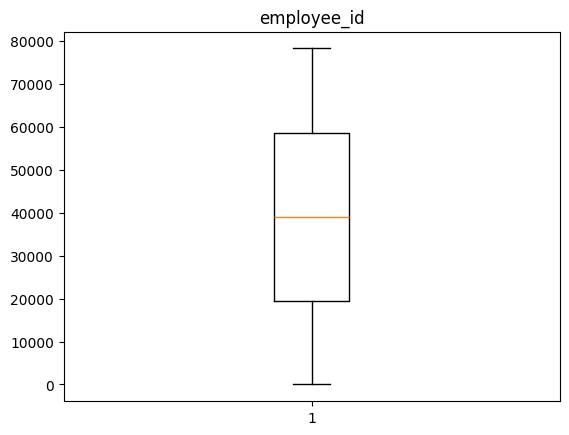

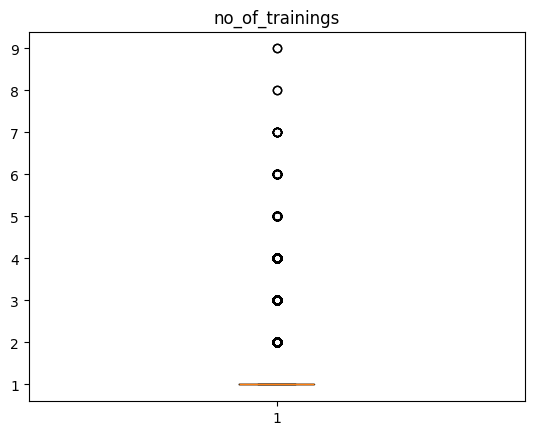

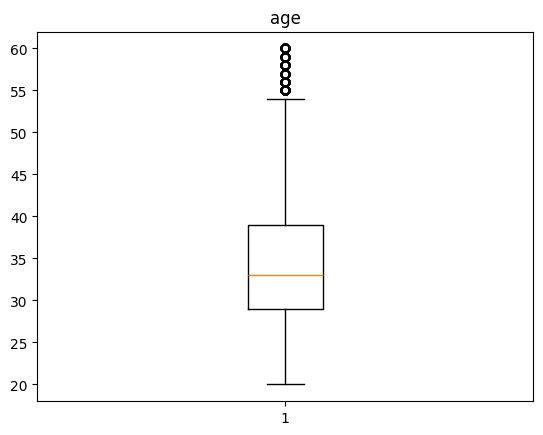

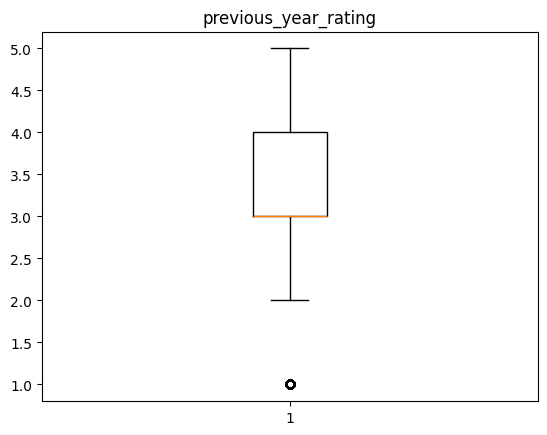

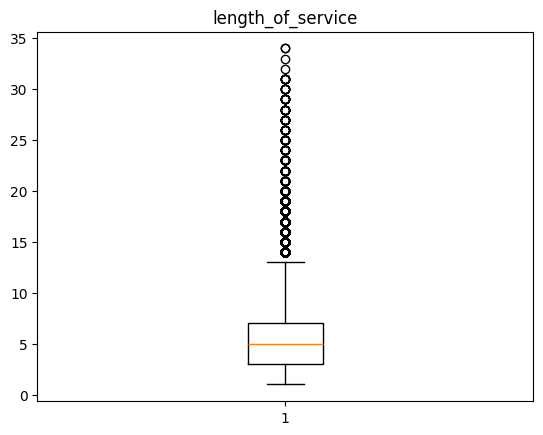

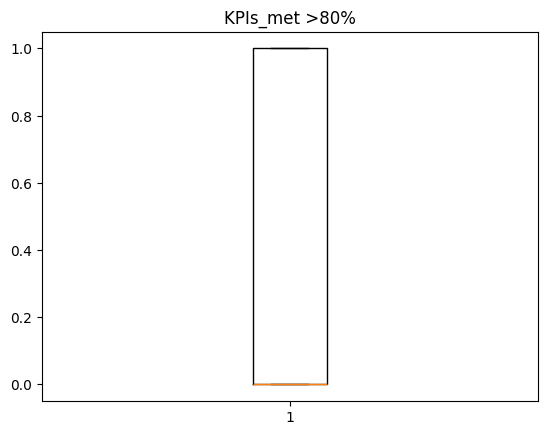

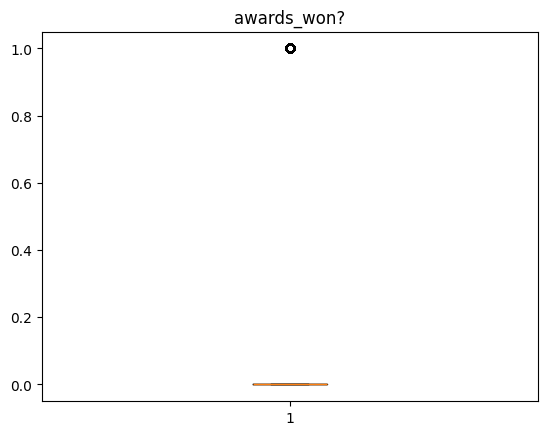

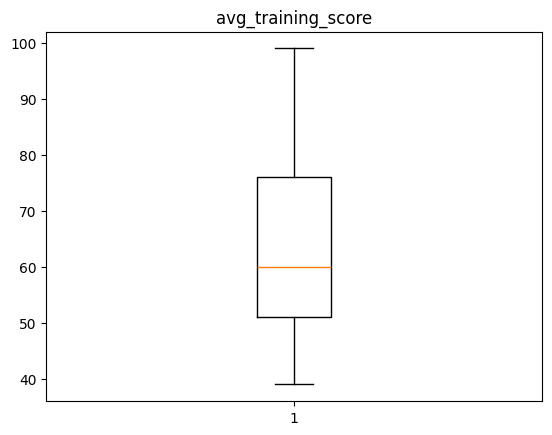

In [143]:
for i in num_feature:
    plt.boxplot(test_data[i])
    plt.title(i)
    plt.show()

SAME LIKE THAT OF TRAIN DATASET, WE DON'T REMOVE OUTLIERS

<Axes: >

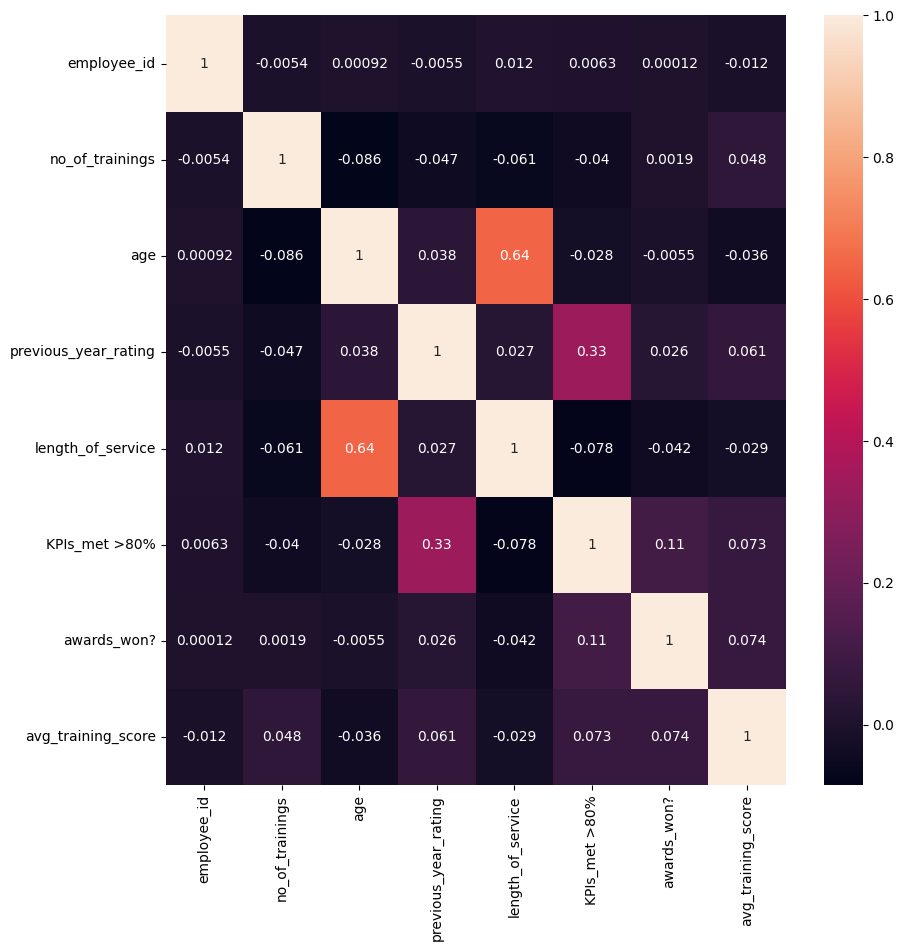

In [144]:
## CORRELATION MATRIX

plt.figure(figsize=(10,10))
sns.heatmap(test_data.corr(numeric_only=True), annot=True)

###ENCODING THE DATASET

In [145]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
test_data = pd.get_dummies(test_data, columns = ["department", "region", "education", "gender", "recruitment_channel"], drop_first = True)
test_data.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,8724,1,24,3.0,1,1,0,77,False,False,...,False,False,False,False,False,False,False,True,False,True
1,74430,1,31,3.0,5,0,0,51,False,True,...,False,False,False,False,False,False,False,False,False,False
2,72255,1,31,1.0,4,0,0,47,False,False,...,False,False,False,False,False,False,False,True,False,False
3,38562,3,31,2.0,9,0,0,65,False,False,...,False,False,False,False,False,False,False,False,False,False
4,64486,1,30,4.0,7,0,0,61,True,False,...,False,False,False,False,False,False,False,True,False,True


###SCALING THE DATASET

In [146]:
from sklearn.preprocessing import StandardScaler

stdclr = StandardScaler()
test_data.loc[:,num_feature] = stdclr.fit_transform(test_data[num_feature]) #selecting the numerical columns to be scaled
test_data.head()

<ipython-input-146-d02a8b170ce5>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.33908838  1.56307815  1.46701063 ...  0.28125039 -1.6720341
 -1.46059722]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  test_data.loc[:,num_feature] = stdclr.fit_transform(test_data[num_feature]) #selecting the numerical columns to be scaled
<ipython-input-146-d02a8b170ce5>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.42309388 -0.42309388 -0.42309388 ... -0.42309388  2.90526356
  2.90526356]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  test_data.loc[:,num_feature] = stdclr.fit_transform(test_data[num_feature]) #selecting the numerical columns to be scaled
<ipython-input-146-d02a8b170ce5>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,-1.339088,-0.423094,-1.404150,-0.257191,-1.143200,1.336715,-0.152665,1.024263,False,False,...,False,False,False,False,False,False,False,True,False,True
1,1.563078,-0.423094,-0.492612,-0.257191,-0.192590,-0.748103,-0.152665,-0.914377,False,True,...,False,False,False,False,False,False,False,False,False,False
2,1.467011,-0.423094,-0.492612,-1.900667,-0.430243,-0.748103,-0.152665,-1.212629,False,False,...,False,False,False,False,False,False,False,True,False,False
3,-0.021175,2.905264,-0.492612,-1.078929,0.758019,-0.748103,-0.152665,0.129506,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1.123862,-0.423094,-0.622832,0.564547,0.282714,-0.748103,-0.152665,-0.168746,True,False,...,False,False,False,False,False,False,False,True,False,True


###PREDICTION USING THE BEST MODEL: XGBOOST

In [147]:
ypred_test_xgb = xgb_model.predict(test_data)
ypred_test_xgb

array([0, 0, 0, ..., 0, 0, 1])

#FINE TUNING

In [110]:
from sklearn.model_selection import GridSearchCV
from re import VERBOSE

#Defining parameter grid

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

#Initialization of GridSearch

grid_search = GridSearchCV(xgb_model, param_grid,cv=3, scoring='f1', verbose=2, n_jobs=-1)
gscv = grid_search.fit(x_train, y_train)
print("Best parameters are : ", gscv.best_params_)
print("Best score is : ", gscv.best_score_)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters are :  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.6}
Best score is :  0.5108338571444037


In [116]:
best_model = grid_search.estimator
ypred_model = best_model.predict(x)

print('Best Parameters:', grid_search.estimator)
print('Tuned Accuracy:', accuracy_score(y, ypred_model))
print('Tuned F1 Score:', f1_score(y, ypred_model))

Best Parameters: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Tuned Accuracy: 0.9490037950664136
Tuned F1 Score: 0.583022527226615


#CREATING CSV FILE WITH PREDICTED VALUES

In [148]:
# Create New Data with Employee ID and predicted Promotion Status

new_data = {"employee_id": td["employee_id"], "is_promoted": ypred_test_xgb}



# Creating Dataframe

df = pd.DataFrame(new_data, columns=["employee_id", "is_promoted"])


# Replacing the values of Promotion Status with predicted values

df["is_promoted"].replace(0,"N",inplace=True)
df["is_promoted"].replace(1,"Y",inplace=True)


# Converting Dataframe to csv file

df.to_csv("Sample_Submission_Krisselle_xgb.csv", index = False)

<ipython-input-148-8e8d8374bc32>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["is_promoted"].replace(0,"N",inplace=True)


In [149]:
nd = pd.read_csv("/content/Sample_Submission_Krisselle_xgb.csv")

In [150]:
nd.head()

,employee_id,is_promoted
0,8724,N
1,74430,N
2,72255,N
3,38562,N
4,64486,N
